In [431]:
import os
import csv
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt

#### Dataset info

In [432]:
# info: https://en.wikipedia.org/wiki/Iris_flower_data_set
# source: https://github.com/pandas-dev/pandas/blob/master/pandas/tests/data/iris.csv

#### Loading files & extracting data

In [433]:
DATASET_DIRECTORY = "./iris_dataset/"

if os.path.isdir(DATASET_DIRECTORY):
    print("Iris dataset found in directory '" + DATASET_DIRECTORY + "':")
    for file in os.listdir(DATASET_DIRECTORY):
        print("- "  + file)
else:
    print("Missing Iris data folder!")

Iris dataset found in directory './iris_dataset/':
- iris.csv


In [434]:
iris_headers = None
iris_rows = None
iris_labels = None

with open(DATASET_DIRECTORY + "iris.csv", "r") as csv_file:
    temp = list(csv.reader(csv_file))
    iris_headers = temp[0]
    iris_rows = np.array([np.array(row[:-1]).astype(np.float32) for row in temp[1:]])
    iris_labels = [row[-1] for row in temp[1:]]

#### Data presentation

In [435]:
rows_to_show = 10

In [436]:
print(iris_headers)

['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name']


In [437]:
for i in range(0, rows_to_show):
    print("Sample no. " + str(i) + " - " + str(iris_rows[i]))

Sample no. 0 - [ 5.0999999   3.5         1.39999998  0.2       ]
Sample no. 1 - [ 4.9000001   3.          1.39999998  0.2       ]
Sample no. 2 - [ 4.69999981  3.20000005  1.29999995  0.2       ]
Sample no. 3 - [ 4.5999999  3.0999999  1.5        0.2      ]
Sample no. 4 - [ 5.          3.5999999   1.39999998  0.2       ]
Sample no. 5 - [ 5.4000001   3.9000001   1.70000005  0.40000001]
Sample no. 6 - [ 4.5999999   3.4000001   1.39999998  0.30000001]
Sample no. 7 - [ 5.         3.4000001  1.5        0.2      ]
Sample no. 8 - [ 4.4000001   2.9000001   1.39999998  0.2       ]
Sample no. 9 - [ 4.9000001  3.0999999  1.5        0.1      ]


In [438]:
for i in range(0, rows_to_show):
    print("Label no. " + str(i) + " - " + str(iris_labels[i]))

Label no. 0 - Iris-setosa
Label no. 1 - Iris-setosa
Label no. 2 - Iris-setosa
Label no. 3 - Iris-setosa
Label no. 4 - Iris-setosa
Label no. 5 - Iris-setosa
Label no. 6 - Iris-setosa
Label no. 7 - Iris-setosa
Label no. 8 - Iris-setosa
Label no. 9 - Iris-setosa


In [439]:
print("Number of samples: " + str(len(iris_rows)))

Number of samples: 150


#### Divide data:

Classes will be divided so each set contains same amount of each class type.

In [440]:
classes = set(iris_labels)
num_of_classes = len(classes)
print("Detected num of different classes: " + str(num_of_classes))
print(classes)

Detected num of different classes: 3
{'Iris-setosa', 'Iris-virginica', 'Iris-versicolor'}


In [441]:
samples_divided_by_classes = dict()
for row, label in zip(iris_rows, iris_labels):
    if label not in samples_divided_by_classes.keys():
        samples_divided_by_classes.update({label: list()})
    
    samples_divided_by_classes[label].append(row)

Spliting into train, validation, test sets.

In [442]:
test_samples_ratio = 0.65
val_test_samples_ratio = 0.5

In [443]:
train_rows = list()
val_rows = list()
test_rows = list()

train_labels = list()
val_labels = list()
test_labels = list()

print("Counting number of remaining samples to split: ")
num_of_samples_per_class = list()
for key in samples_divided_by_classes.keys():
    num_of_samples_per_class.append(len(samples_divided_by_classes[key]))
    print("- Class: " + key + ", num samples: " + str(len(samples_divided_by_classes[key])))

print("\nTrimming data: ")
for sample_class in classes:
    samples_divided_by_classes[sample_class] = samples_divided_by_classes[sample_class][:min(num_of_samples_per_class)]
    print("- Trimming samples of class '" + sample_class + "'to " + str(min(num_of_samples_per_class)) + ".")

print("\nCreating training set: ")
split_index = int(min(num_of_samples_per_class) * test_samples_ratio)
for sample_class in classes:
    train_rows.extend(samples_divided_by_classes[sample_class][:split_index])
    train_labels = [sample_class for sample in train_rows]
    print("- Adding " + str(len(samples_divided_by_classes[sample_class][:split_index])) + " samples of class '"
          + sample_class + "' to training set.")
    samples_divided_by_classes[sample_class] = samples_divided_by_classes[sample_class][split_index:]

print("\nCounting number of remaining samples to split: ")
num_of_samples_per_class = list()
for key in samples_divided_by_classes.keys():
    num_of_samples_per_class.append(len(samples_divided_by_classes[key]))
    print("- Class: " + key + ", num samples: " + str(len(samples_divided_by_classes[key])))

print("\nCreating validation and train set: ")
split_index = int(min(num_of_samples_per_class) * val_test_samples_ratio)
for sample_class in classes:
    val_rows.extend(samples_divided_by_classes[sample_class][:split_index])
    val_labels = [sample_class for sample in val_rows]
    print("- Adding " + str(len(samples_divided_by_classes[sample_class][:split_index])) + " samples of class '"
          + sample_class + "' to validation set.")
    
    test_rows.extend(samples_divided_by_classes[sample_class][split_index:])
    test_labels = [sample_class for sample in test_rows]
    print("- Adding " + str(len(samples_divided_by_classes[sample_class][split_index:])) + " samples of class '"
          + sample_class + "' to test set.")
    
print("\nConverting types to ndarray.")
train_data = np.array([(sample, label) for sample, label in zip(train_rows, train_labels)])
train_rows = np.array(train_rows)
train_labels = np.array(train_labels)

val_rows = np.array(val_rows)
test_rows = np.array(test_rows)


val_labels = np.array(val_labels)
test_labels = np.array(test_labels)

Counting number of remaining samples to split: 
- Class: Iris-setosa, num samples: 50
- Class: Iris-versicolor, num samples: 50
- Class: Iris-virginica, num samples: 50

Trimming data: 
- Trimming samples of class 'Iris-setosa'to 50.
- Trimming samples of class 'Iris-virginica'to 50.
- Trimming samples of class 'Iris-versicolor'to 50.

Creating training set: 
- Adding 32 samples of class 'Iris-setosa' to training set.
- Adding 32 samples of class 'Iris-virginica' to training set.
- Adding 32 samples of class 'Iris-versicolor' to training set.

Counting number of remaining samples to split: 
- Class: Iris-setosa, num samples: 18
- Class: Iris-versicolor, num samples: 18
- Class: Iris-virginica, num samples: 18

Creating validation and train set: 
- Adding 9 samples of class 'Iris-setosa' to validation set.
- Adding 9 samples of class 'Iris-setosa' to test set.
- Adding 9 samples of class 'Iris-virginica' to validation set.
- Adding 9 samples of class 'Iris-virginica' to test set.
- Addi

In [444]:
print("Train data samples: " + str(len(train_data)))
# print("Validation data samples: " + str(len(val_rows)))
# print("Test data samples: " + str(len(test_rows)))

Train data samples: 96


In [445]:
class DecisionTree:
    def __init__(self): 
        self.root = None
    
    def split_samples_by_feature_value_in_sample(self, feature_index, sample, samples, labels):
        left_node, right_node = list(), list()

        decisive_value_for_split = sample[feature_index]
        for sample, label in zip(samples, labels):
            if sample[feature_index] < decisive_value_for_split:
                left_node.append((sample, label))
            else:
                right_node.append((sample, label))

        return (left_node, right_node)

    def gini_index(self, left_node, right_node, classes):
        gini_purity = 0.0

        num_of_classes = len(classes)
        left_node_labels = np.array([data_label_pair[1] for data_label_pair in left_node])
        right_node_labels = np.array([data_label_pair[1] for data_label_pair in right_node])

        for class_ in classes:
            if len(left_node_labels) > 0:
                num_labels = len(left_node_labels)
                left_node_class_proportion = np.divide((left_node_labels == class_).sum(), num_labels)
                gini_purity += (left_node_class_proportion * (1.0 - left_node_class_proportion)) 

            if len(right_node_labels) > 0:
                num_labels = len(right_node_labels)
                right_node_class_proprtion = np.divide((right_node_labels == class_).sum(), num_labels)
                gini_purity += (right_node_class_proprtion * (1.0 - right_node_class_proprtion))

        return gini_purity

    def best_split(self, data):
        split = {"feature_index": None, 
                 "feature_value": None, 
                 "purity_value": None, 
                 "nodes": None}

        samples = np.array([data_label_pair[0] for data_label_pair in data])
        labels = np.array([data_label_pair[1] for data_label_pair in data])

        all_classes = set(labels)
        num_of_features_per_sample = samples.shape[1]
        for feature_index in range(num_of_features_per_sample):
            for sample in samples:
                left_node, right_node = \
                    self.split_samples_by_feature_value_in_sample(feature_index, sample, samples, labels)
                split_purity = self.gini_index(left_node, right_node, all_classes)
                    
                if split["purity_value"] == None or split_purity < split["purity_value"]:
                    
                    class_vote = np.unique(labels, return_counts=True)
                    split_data_info = list()
                    for class_, count_ in zip(class_vote[0], class_vote[1]):
                        split_data_info.append("c'" + str(class_) + "' - " + str(count_) 
                                               + (" sample" if count_ == 1 else " samples"))
                    desc = "(" + ", ".join(split_data_info) + ")"
                   
                    split = {"split_info": desc,
                             "feature_index": feature_index, 
                             "feature_value": sample[feature_index], 
                             "purity_value": split_purity, 
                             "nodes": {"left": left_node, "right": right_node}}

        return split

    def make_terminal_node(self, data):
        labels = np.array([data_label_pair[1] for data_label_pair in data])
        
        class_vote = np.unique(labels, return_counts=True)
        split_data_info = list()
        for class_, count_ in zip(class_vote[0], class_vote[1]):
            split_data_info.append("c'" + str(class_) + "' - " + str(count_) 
                                   + (" sample" if count_ == 1 else " samples"))
        desc = "(" + ", ".join(split_data_info) + ")"
        
        return class_vote[0][0], desc

    def split(self, previous_split, max_tree_depth, min_split_samples, depth):  
        left_node_samples_num = len(previous_split["nodes"]["left"])
        right_node_samples_num = len(previous_split["nodes"]["right"])
        
        # check for class type
        
        if left_node_samples_num == 0 or right_node_samples_num == 0:
            all_node_samples = list()
            for sample in previous_split["nodes"]["left"]:
                all_node_samples.append(sample)
            for sample in previous_split["nodes"]["right"]:
                all_node_samples.append(sample)
            
            previous_split["nodes"]["left"] = self.make_terminal_node(all_node_samples)
            previous_split["nodes"]["right"] = self.make_terminal_node(all_node_samples)
            return

        if depth >= max_tree_depth:
            previous_split["nodes"]["left"] = self.make_terminal_node(previous_split["nodes"]["left"])
            previous_split["nodes"]["right"] = self.make_terminal_node(previous_split["nodes"]["right"])
            return

        if len(previous_split["nodes"]["left"]) <= min_split_samples:
            previous_split["nodes"]["left"] = self.make_terminal_node(previous_split["nodes"]["left"])
        else:
            previous_split["nodes"]["left"] = self.best_split(previous_split["nodes"]["left"])
            self.split(previous_split["nodes"]["left"], max_tree_depth, min_split_samples, (depth + 1))

        if len(previous_split["nodes"]["right"]) <= min_split_samples:
            previous_split["nodes"]["right"] = self.make_terminal_node(previous_split["nodes"]["right"])
        else:
            previous_split["nodes"]["right"] = self.best_split(previous_split["nodes"]["right"])
            self.split(previous_split["nodes"]["right"], max_tree_depth, min_split_samples, (depth + 1))

    def build(self, data, max_tree_depth, min_split_samples):
        self.root = self.best_split(data)
        self.split(self.root, max_tree_depth, min_split_samples, 1)
        
    def draw(self, node, depth=0, comment = "root"):
        if isinstance(node, dict):
            print("{}{}: Split [{}]: {} by (feature_index '{}' < {}):".format("   "*depth,
                                                                       depth,
                                                                       comment,
                                                                       node["split_info"],
                                                                       node["feature_index"],
                                                                       node["feature_value"]))
            self.draw(node["nodes"]["left"], (depth + 1), "left")
            self.draw(node["nodes"]["right"], (depth + 1), "right")
        else:
            print("{}{}: Terminal node [{}]: {}".format("   "*depth, depth, comment, node))

In [449]:
tree = DecisionTree()
tree.build(train_data, 10, 2)

In [450]:
print(tree.draw(tree.root))

0: Split [root]: (c'Iris-versicolor' - 96 samples) by (feature_index '0' < 5.099999904632568):
   1: Split [left]: (c'Iris-versicolor' - 20 samples) by (feature_index '0' < 4.900000095367432):
      2: Split [left]: (c'Iris-versicolor' - 11 samples) by (feature_index '0' < 4.699999809265137):
         3: Split [left]: (c'Iris-versicolor' - 5 samples) by (feature_index '0' < 4.599999904632568):
            4: Terminal node [left]: ('Iris-versicolor', "(c'Iris-versicolor' - 2 samples)")
            4: Split [right]: (c'Iris-versicolor' - 3 samples) by (feature_index '0' < 4.599999904632568):
               5: Terminal node [left]: ('Iris-versicolor', "(c'Iris-versicolor' - 3 samples)")
               5: Terminal node [right]: ('Iris-versicolor', "(c'Iris-versicolor' - 3 samples)")
         3: Split [right]: (c'Iris-versicolor' - 6 samples) by (feature_index '0' < 4.699999809265137):
            4: Terminal node [left]: ('Iris-versicolor', "(c'Iris-versicolor' - 6 samples)")
            4

In [451]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=2, criterion='gini')
clf = clf.fit(iris.data, iris.target)

In [452]:
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

In [453]:
import os
os.unlink('iris.dot')

In [454]:
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("iris.pdf") 

True

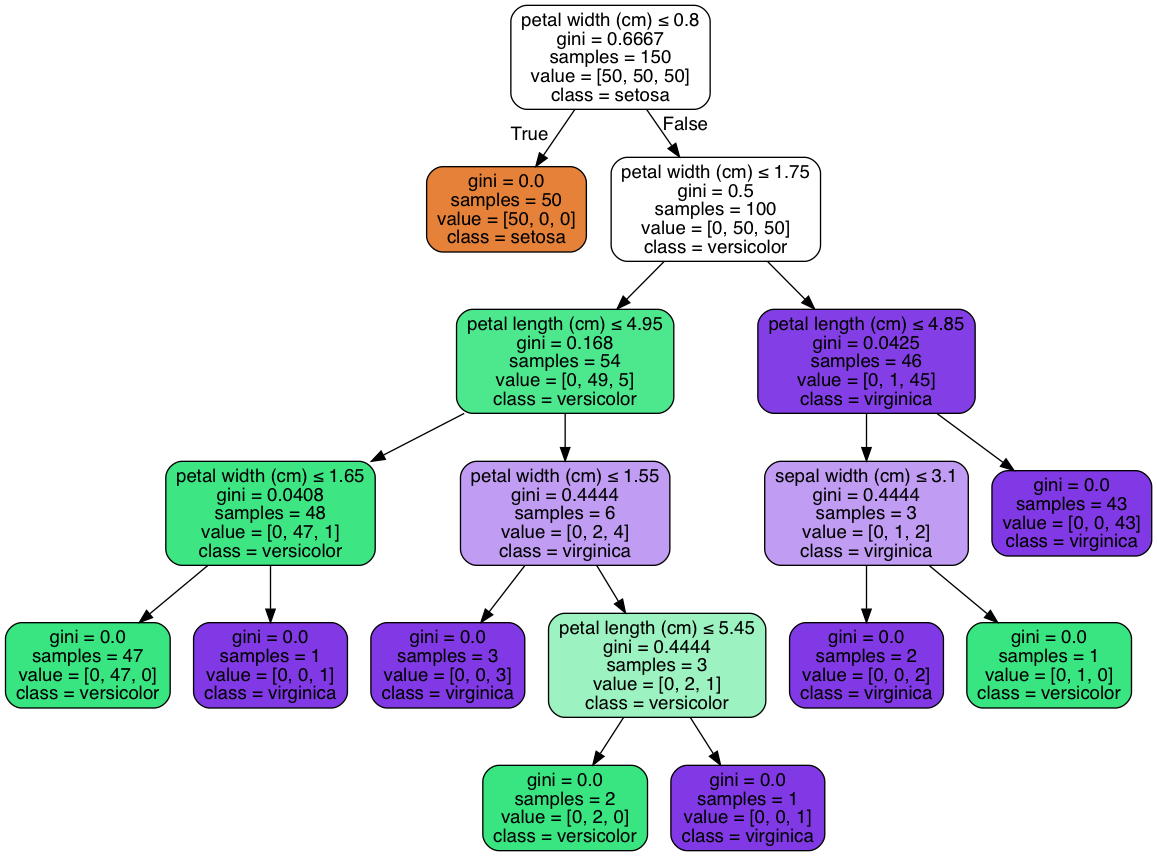

In [455]:
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

In [458]:
train_data2 = [(sample, label) for sample, label in zip(iris.data, iris.target)]
tree = DecisionTree()
tree.build(train_data2, 10, 2)

In [460]:
print(tree.draw(tree.root))

0: Split [root]: (c'0' - 50 samples, c'1' - 50 samples, c'2' - 50 samples) by (feature_index '2' < 3.0):
   1: Split [left]: (c'0' - 50 samples) by (feature_index '0' < 5.1):
      2: Split [left]: (c'0' - 28 samples) by (feature_index '0' < 4.9):
         3: Split [left]: (c'0' - 16 samples) by (feature_index '0' < 4.7):
            4: Split [left]: (c'0' - 9 samples) by (feature_index '0' < 4.6):
               5: Split [left]: (c'0' - 5 samples) by (feature_index '0' < 4.4):
                  6: Terminal node [left]: (0, "(c'0' - 1 sample)")
                  6: Split [right]: (c'0' - 4 samples) by (feature_index '0' < 4.4):
                     7: Terminal node [left]: (0, "(c'0' - 4 samples)")
                     7: Terminal node [right]: (0, "(c'0' - 4 samples)")
               5: Split [right]: (c'0' - 4 samples) by (feature_index '0' < 4.6):
                  6: Terminal node [left]: (0, "(c'0' - 4 samples)")
                  6: Terminal node [right]: (0, "(c'0' - 4 samples)"